In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier




from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import joblib

In [93]:
data = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


DATA CLEANING

In [95]:
data[(data["slope"] < 1) | (data["slope"] > 3)]

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
12,223295,27,1,0,129,135,0,1,192,1,1.0,0,0,0
19,260870,35,1,0,127,269,0,0,87,1,3.8,0,1,0
25,390931,71,1,1,101,352,0,1,183,0,3.6,0,0,0
26,390988,46,1,0,198,253,0,0,199,1,2.1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,9736370,65,1,0,125,346,0,1,93,1,3.9,0,0,0
988,9870657,74,1,0,136,279,0,1,122,0,1.2,0,0,0
991,9896438,24,1,0,170,354,0,0,90,1,1.5,0,0,0
994,9937998,62,1,1,125,342,0,0,128,1,2.1,0,0,0


In [96]:
data["slope"] = data["slope"].replace(0, np.nan)

data["slope"] = data["slope"].fillna(data["slope"].median())

In [97]:
data["slope"].isna().sum()

np.int64(0)

In [98]:
data["serumcholestrol"] = data["serumcholestrol"].replace(0, np.nan)

data["serumcholestrol"] = data["serumcholestrol"].interpolate(method="linear")


data["serumcholestrol"] = data["serumcholestrol"].fillna(data["serumcholestrol"].median())

In [99]:
data["serumcholestrol"].isna().sum()

np.int64(0)

**DATA ANALYSIS** 

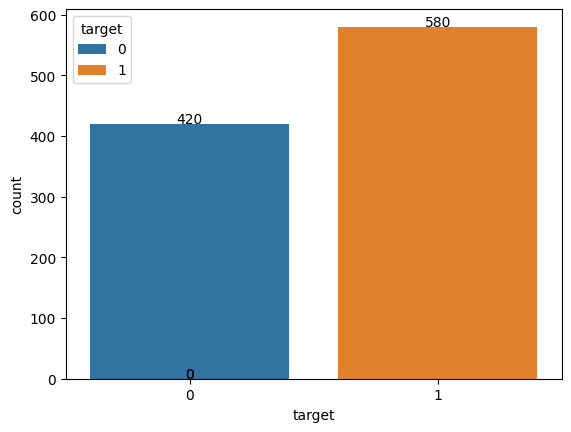

In [100]:
# distribution of target value
ax = sns.countplot(data, x = "target", hue = "target", stat = "count")

for value in ax.patches:
    height = value.get_height()
    ax.text(value.get_x() + value.get_width() / 2 , height + 0.5, '{:1.0f}'.format(height), ha = "center")
plt.show()

In [101]:
data = data.drop(columns=["patientid"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   float64
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   float64
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 101.7 KB


In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
categorical_features = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia', 'slope', 'noofmajorvessels']
target = 'target'

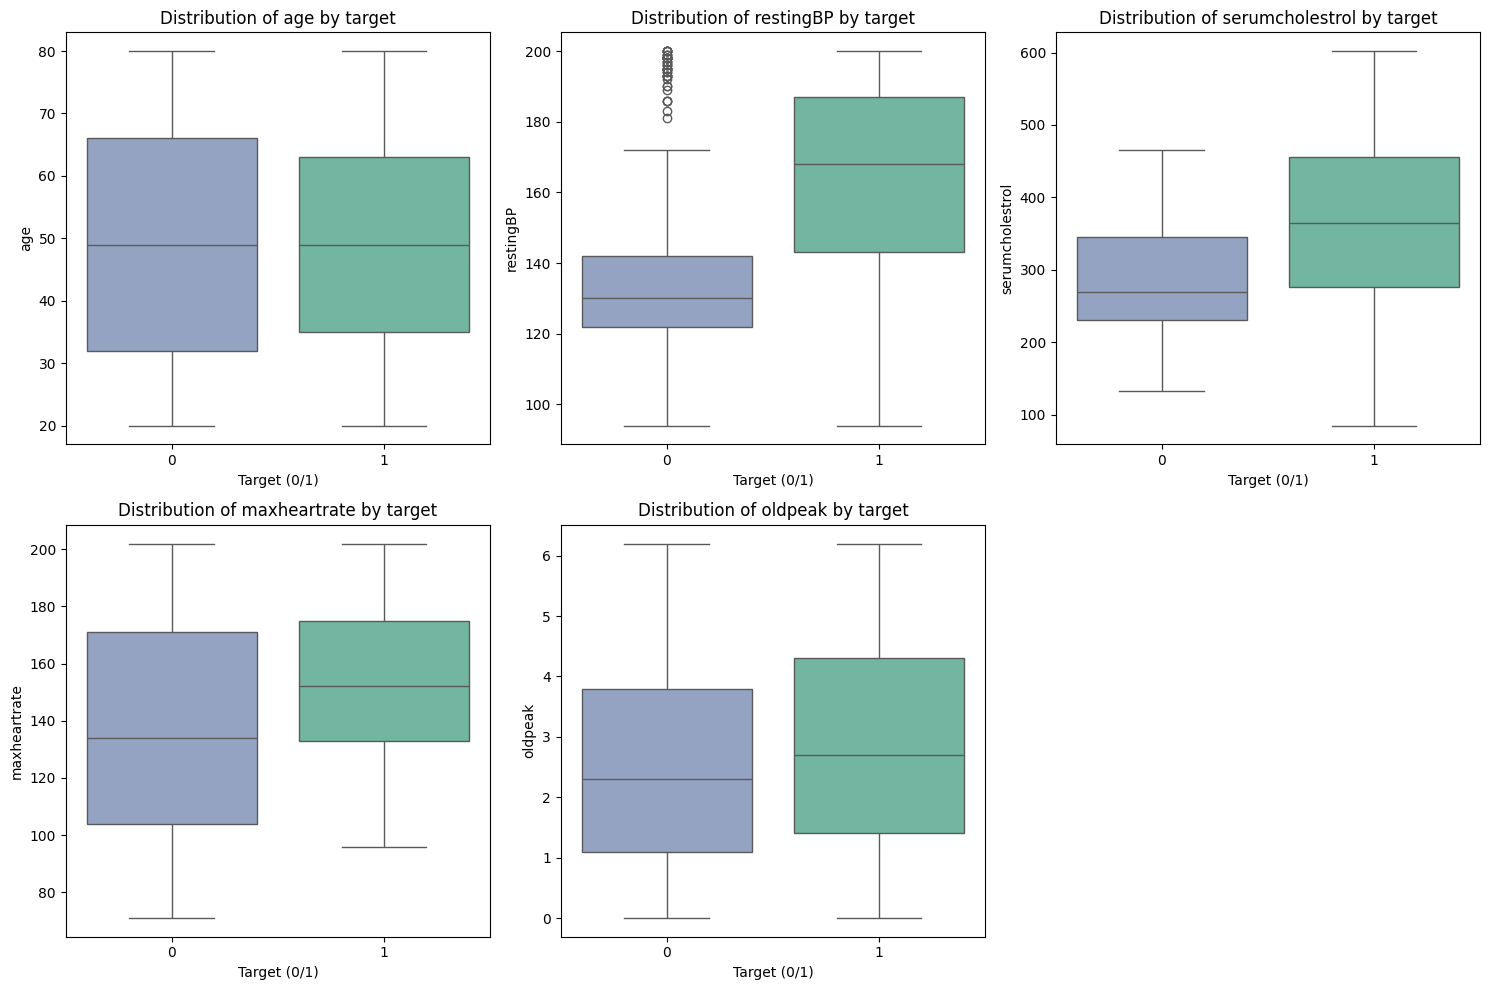

In [103]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=target, y=feature, data=data, palette={1: "#66c2a5", 0: "#8da0cb"}, hue=target, legend=False)
    
    plt.title(f'Distribution of {feature} by target', fontsize=12)
    plt.xlabel('Target (0/1)', fontsize=10)
    plt.ylabel(feature, fontsize=10)

plt.tight_layout()
plt.show()

1. Age
No outliers for either target group.
Action: No scaling or cleaning required.

2. RestingBP
Many outliers for target = 0 (high blood pressure values above the upper whisker).
These are likely real high-BP cases, not data errors.
Effect: Important signal for classification; should not be removed.
Action: Use RobustScaler for SVM/KNN models if scaling is required.

3. Serum Cholesterol
No formal outliers, but the distribution has a long upper tail.
Effect: May cause issues for StandardScaler but not a data-quality problem.
Action: Use RobustScaler for SVM/KNN models if scaling is required.

4. Max Heart Rate
No outliers, only wide spread.
Action: No cleaning needed.

5. Oldpeak
No outliers, moderate skew.
Action: Use RobustScaler for SVM/KNN models if scaling is required.

Все чтобы не забыть надо будет норм красиво выводы написать по графикам и тут просто предложения как скейлить потом данные 

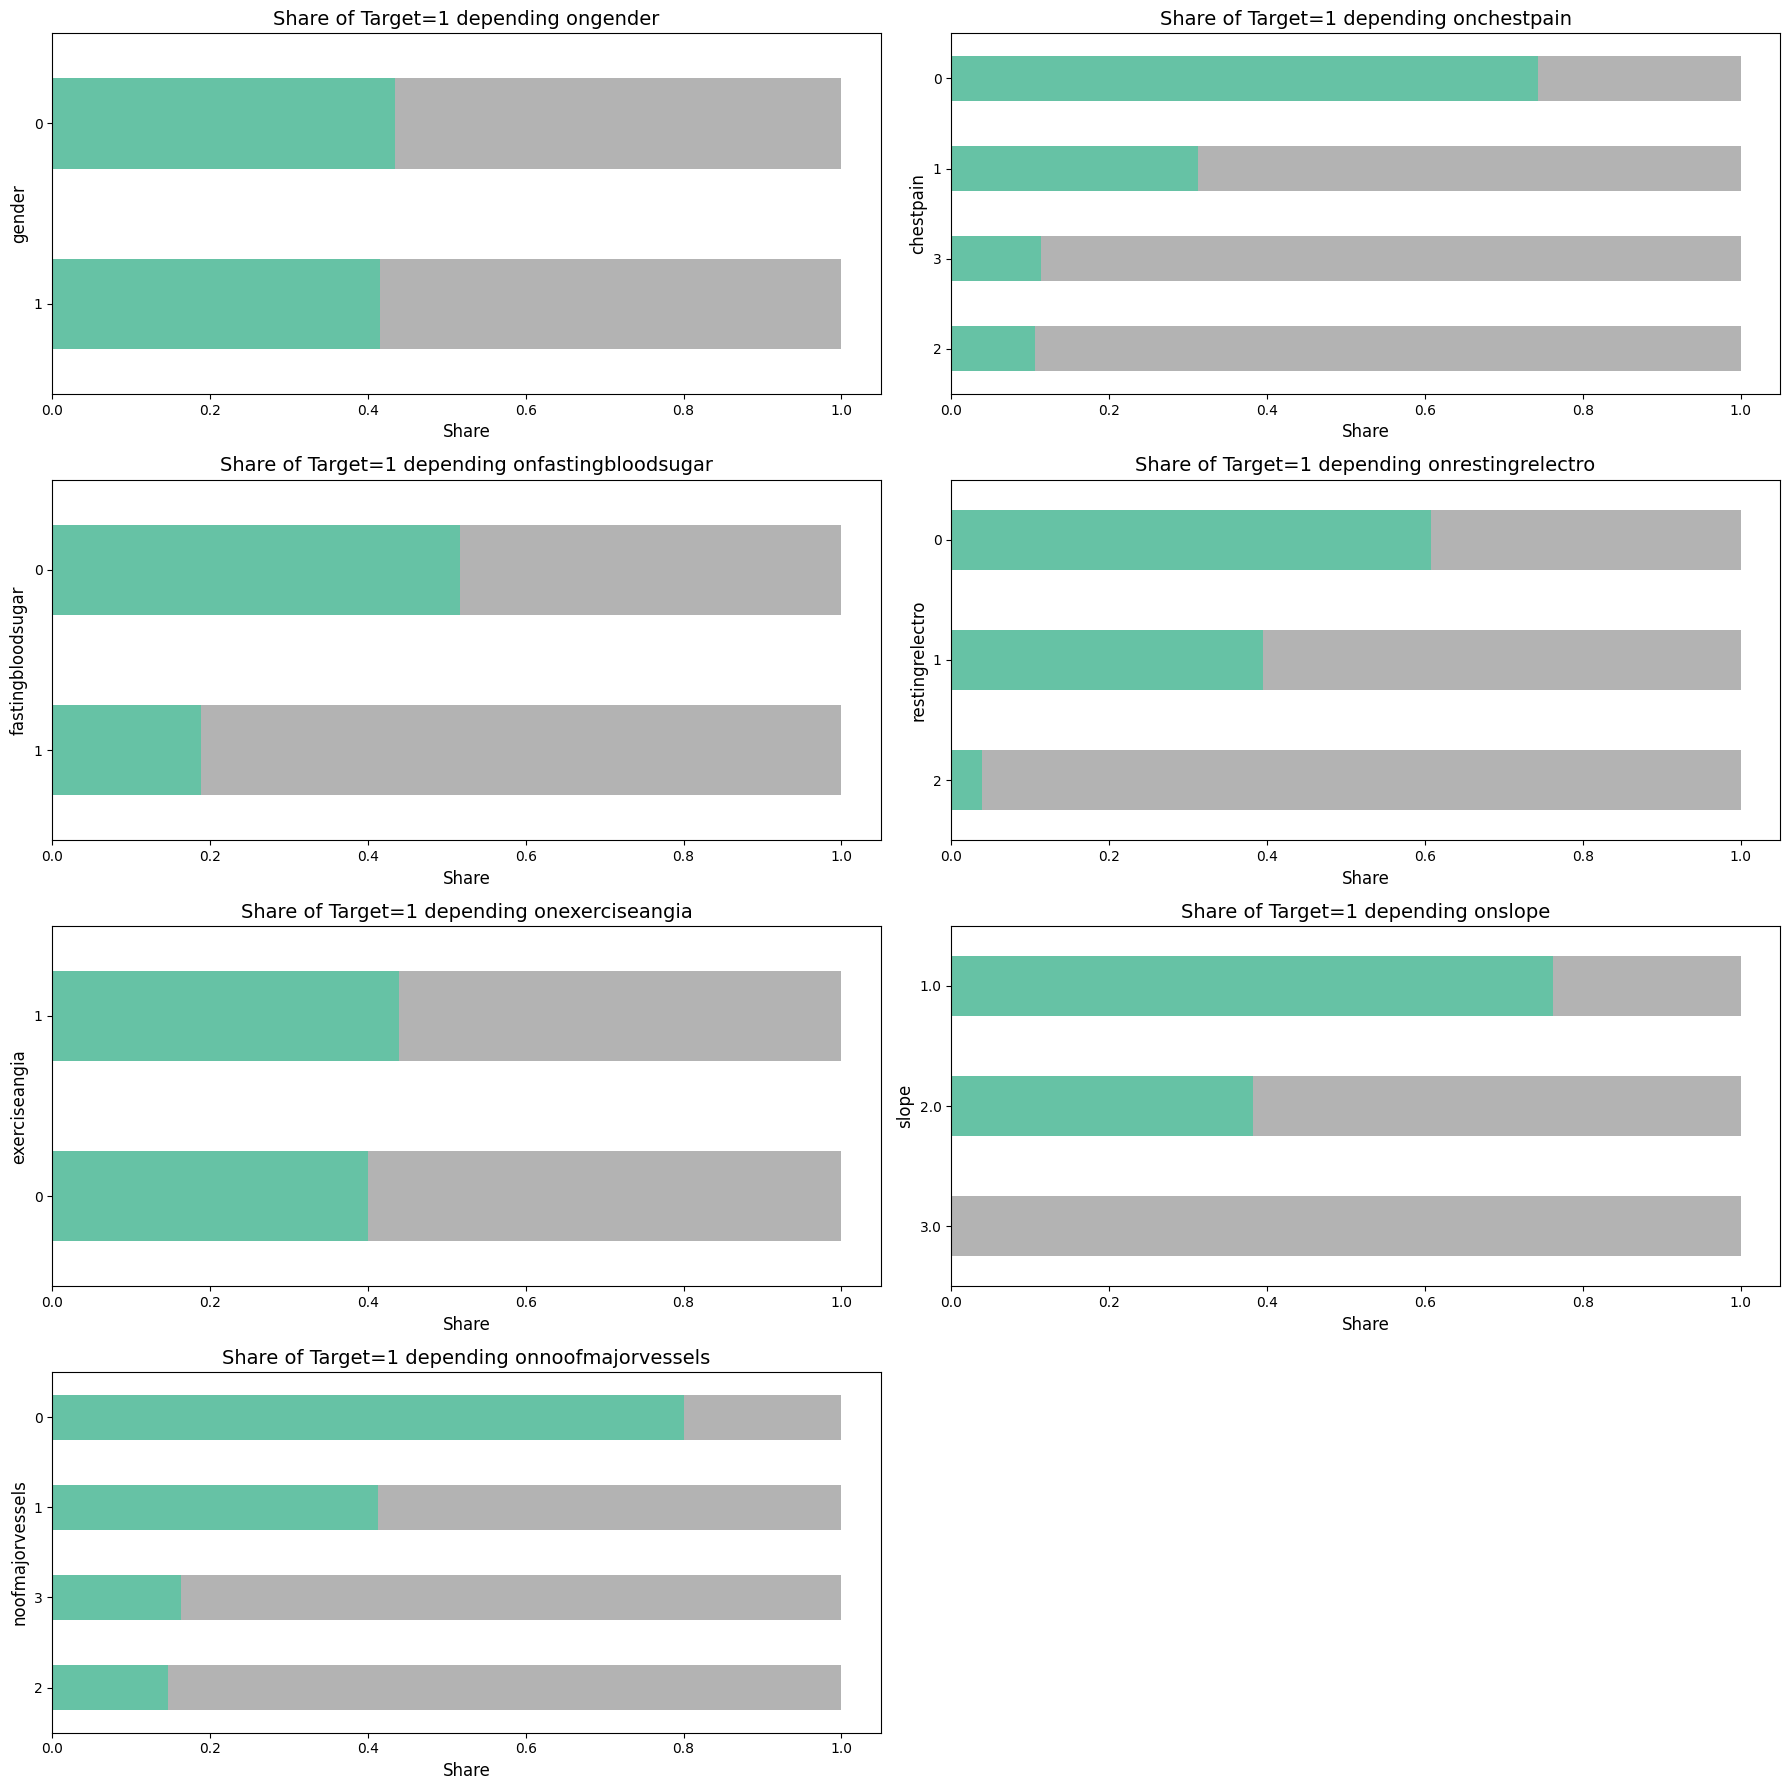

In [104]:
plt.figure(figsize=(18, 18))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 2, i + 1)
    
    counts = data.groupby([feature, target]).size().unstack(fill_value=0)
    
    totals = counts.sum(axis=1)
    proportions = counts.div(totals, axis=0)

    proportions_sorted = proportions.sort_values(by=1, ascending=False)
    proportions_sorted.plot(kind='barh', stacked=True, cmap='Set2', ax=plt.gca())
    
    plt.title(f'Share of Target=1 depending on{feature}', fontsize=14)
    plt.xlabel('Share', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.legend().set_visible(False)

plt.tight_layout()
plt.show()

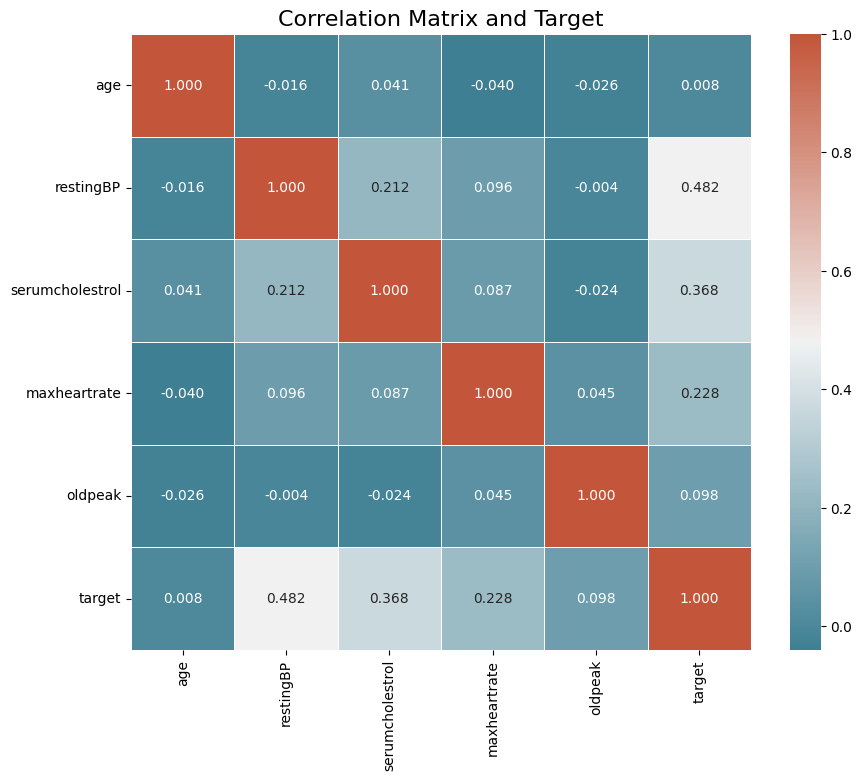

In [105]:
features_for_corr = [
    'age', 
    'restingBP', 
    'serumcholestrol', 
    'maxheartrate', 
    'oldpeak', 
    'target'
]

correlation_matrix = data[features_for_corr].corr()

plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(
    correlation_matrix,
    annot=True,      
    cmap=cmap,    
    fmt=".3f",          
    linewidths=.5,      
    cbar=True           
)

plt.title('Correlation Matrix and Target', fontsize=16)
plt.show()

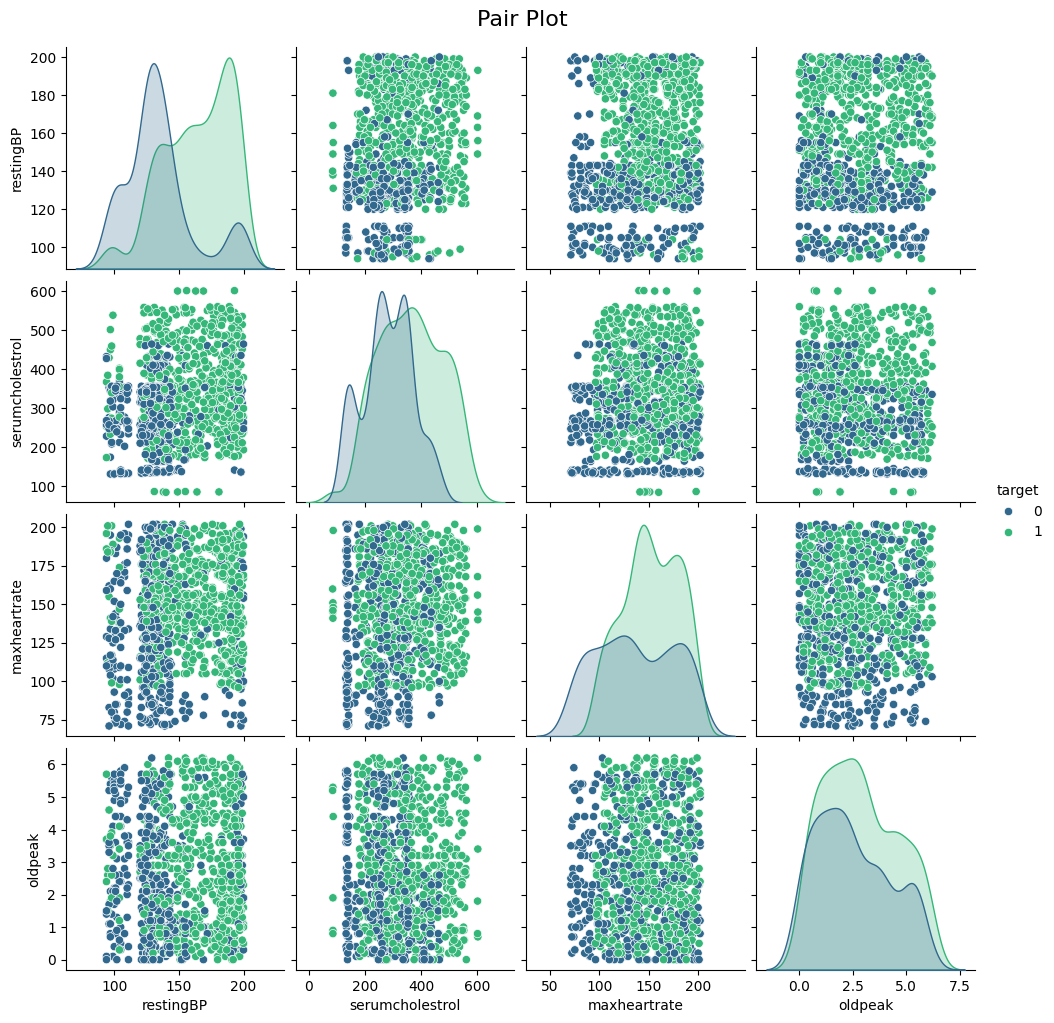

In [106]:
strong_numerical_features = [
    'restingBP',
    'serumcholestrol',
    'maxheartrate',
    'oldpeak',
    'target'
]
sns.pairplot(
    data[strong_numerical_features],
    hue='target',
    palette='viridis',
    diag_kind='kde'
)

plt.suptitle('Pair Plot', y=1.02, fontsize=16)
plt.show()

In [107]:
# убираю выбросы из первых вузуализаций смотрим боксплоты
outlier_features = ['restingBP', 'serumcholestrol']
for feature in outlier_features:
    upper_bound = data[feature].quantile(0.99)
    data[feature] = np.where(
        data[feature] > upper_bound,
        upper_bound,
        data[feature]
    )

In [108]:
# убираю скошенность
skewed_features = ['restingBP', 'serumcholestrol'] 

for feature in skewed_features:
    data[feature] = np.log(data[feature])

In [109]:
# Для номинальных сделаем one hot encoding
ohe_features = ['gender', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia']
ordinal_features = ['chestpain', 'slope', 'noofmajorvessels']
data = pd.get_dummies(data, columns=ohe_features, drop_first=True)

In [110]:
# train and test data split
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
Y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

In [111]:
from sklearn.preprocessing import RobustScaler
numerical_features = X_train.columns.difference([
    'gender_1',              # OHE
    'fastingbloodsugar_1',   # OHE
    'restingrelectro_1',     # OHE
    'restingrelectro_2',     # OHE
    'exerciseangia_1'        # OHE
])
scaler = RobustScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [112]:
X_train.head()

,age,chestpain,restingBP,serumcholestrol,maxheartrate,oldpeak,slope,noofmajorvessels,gender_1,fastingbloodsugar_1,restingrelectro_1,restingrelectro_2,exerciseangia_1
289,0.100000,-0.5,0.030469,1.039172,-0.203704,-0.530973,0.0,0.5,True,False,True,False,True
821,-0.100000,-0.5,-0.522630,-0.553406,-0.944444,-0.849558,0.0,-0.5,True,True,False,False,False
66,1.000000,1.0,0.930554,-0.425449,0.370370,-0.460177,1.0,0.5,True,True,False,True,False
190,0.766667,0.5,0.615603,1.065532,-0.018519,0.991150,0.0,0.0,True,True,False,False,False
256,1.000000,0.5,0.497032,0.062024,-0.425926,1.238938,0.0,0.5,True,False,False,False,False


In [113]:
logist_regres = LogisticRegression()
logist_regres.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [118]:
Y_pred = logist_regres.predict(X_test)
accuracy_result = accuracy_score(Y_test,Y_pred) * 100

print('точность : {} %'.format(accuracy_result))

точность : 90.0 %


In [ ]:

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 72  12]
 [  8 108]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        84
           1       0.90      0.93      0.92       116

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.90       200
weighted avg       0.90      0.90      0.90       200

